In [1]:
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
  


In [2]:
def paths_to_df(lista):
    final=pd.DataFrame(columns=['id', 'text','sentiment',  'path'])
    for fol in lista:
        dat=pd.read_csv(fol)
        dat['path']=dat[['id','hashtag']].apply(lambda x : f'..\data\\{x[1]}\images\\{x[0]}.png', axis=1)
        dat=dat.drop(columns=['date', 'url'])
        final=final.append(dat, ignore_index=True)
    final=final[final.sentiment != 'discard']
    return final
    

def df_generator(path, split=False):
    dati=glob(f'{path}\*\*labeled.csv')
    if split==False:
        result=paths_to_df(dati)
        return (result)
    else:
        train=paths_to_df(dati[split:])
        test=paths_to_df(dati[:split])
        return(train, test)
    
def balancer(df):
    g = df.groupby('sentiment')
    res=pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
    res=res.droplevel(level=0)
    res=res.reset_index().drop(columns=['index'])
    
    return res

In [3]:
train_, test_=df_generator('..\data', split=3)

In [4]:
train_

,id,text,sentiment,path,hashtag
0,1321403480133799937,“E ci sei\nadesso tu”\n\nFacciamo tanti auguri...,positive,..\data\CTCF\images\1321403480133799937.png,CTCF
1,1321375576368861185,"Come la tv sta trattando l'ecologia, proprio i...",neutral,..\data\CTCF\images\1321375576368861185.png,CTCF
3,1321194101073711104,Durante la clip su Ornella si è sentita la sua...,neutral,..\data\CTCF\images\1321194101073711104.png,CTCF
4,1321169330047012866,“Siamo sicuri che il problemi siano i bar e i ...,neutral,..\data\CTCF\images\1321169330047012866.png,CTCF
6,1321119330445205504,RT fabfazio 📺 ⁦@chetempochefa⁩ torna domenica ...,neutral,..\data\CTCF\images\1321119330445205504.png,CTCF
...,...,...,...,...,...
10589,1088779289842073600,Meraviglioso #LinoGuanciale 😍🔝👍🏻 #attore #teat...,positive,..\data\nondirloalmiocapo2\images\108877928984...,nondirloalmiocapo2
10590,1088427884807626752,"«Enrico, evolve, non diventa un superuomo però...",positive,..\data\nondirloalmiocapo2\images\108842788480...,nondirloalmiocapo2
10591,1087254127988695042,Per iniziare bene la giornata😍 Buongiorno my l...,positive,..\data\nondirloalmiocapo2\images\108725412798...,nondirloalmiocapo2
10592,1086818197519646721,Finale degno di nota e ti prego Rai non ammazz...,positive,..\data\nondirloalmiocapo2\images\108681819751...,nondirloalmiocapo2


In [5]:
test_

,id,text,sentiment,path,hashtag
0,1321341245185286145,concorrenti di amici19 che per guadagnare qual...,negative,..\data\amici19\images\1321341245185286145.png,amici19
1,1319754525708832769,"ACCADDE STASERA: #23ottobre 2019, 1 anno fa Pa...",neutral,..\data\amici19\images\1319754525708832769.png,amici19
2,1319685252378464256,Recensione #RidoMale #Tish \n1°brano in italia...,neutral,..\data\amici19\images\1319685252378464256.png,amici19
3,1319605426367942662,"Se dopo #XFactor, con Emma, se lo fa scappare ...",positive,..\data\amici19\images\1319605426367942662.png,amici19
4,1319605052508602368,Domani alle 21:30 torna l'appuntamento settima...,neutral,..\data\amici19\images\1319605052508602368.png,amici19
...,...,...,...,...,...
3539,1101221393172185088,Suor Angela pronta ad indagare sul dottore 😂😂 ...,positive,..\data\chediociaiuti\images\11012213931721850...,chediociaiuti
3540,1101219592012292098,Amo questa coppia ❤️🤩 @CheDioCiAiuti_5 https:/...,positive,..\data\chediociaiuti\images\11012195920122920...,chediociaiuti
3543,1101217979377758208,«Volete sapere come si scoraggia un uomo? Moll...,positive,..\data\chediociaiuti\images\11012179793777582...,chediociaiuti
3544,1101217486152830976,Giovedì sera = divano e #CheDioCiAiuti5 @CheDi...,positive,..\data\chediociaiuti\images\11012174861528309...,chediociaiuti


<AxesSubplot:>

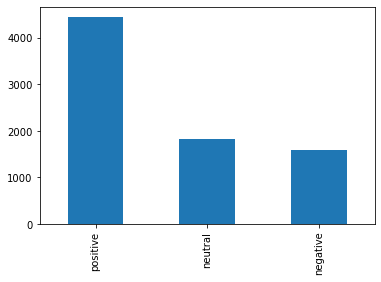

In [6]:
fig, ax = plt.subplots()
train_['sentiment'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

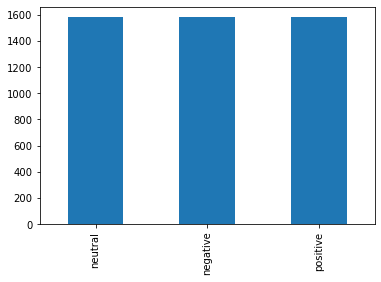

In [7]:
train_balanced=balancer(train_)
train_balanced['sentiment'].value_counts().plot(kind='bar')


In [8]:
len(train_balanced)

4746

In [9]:
test_balanced=balancer(test_)
len(test_balanced)

1281

In [10]:
train_balanced['path'][0]

'..\\data\\donmatteo12\\images\\1240772681827581955.png'

In [11]:
from PIL import Image
import pytesseract
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import time
import cv2
from tqdm import tqdm 

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' 

In [12]:
def preprocess_final(im):
    im= cv2.bilateralFilter(im,5, 55,60)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    _, im = cv2.threshold(im, 240, 255, 1)
    return im

In [13]:
custom_config = r"--oem 3 --psm 11 -c tessedit_char_whitelist='ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz '"

In [14]:
res=[]
for p in tqdm(list(test_balanced['path'])):
    im=np.array(Image.open(p))
    try:
        im=preprocess_final(im)
        text = pytesseract.image_to_string(im, lang='ita', config=custom_config)
        res.append((text.replace('\n', '').replace('\x0c', '')[0:50]))
    except:
        res.append('')
    

100%|██████████████████████████████████████████████████████████████████████████████| 1281/1281 [05:15<00:00,  4.06it/s]


In [15]:
test_balanced['inimagetext']=res

In [19]:
res2=[]
for p in tqdm(list(train_balanced['path'])):
    im=np.array(Image.open(p))
    try:
        im=preprocess_final(im)
        text = pytesseract.image_to_string(im, lang='ita', config=custom_config)
        res2.append((text.replace('\n', '').replace('\x0c', '')[0:50]))
    except:
        res2.append('')
    

100%|██████████████████████████████████████████████████████████████████████████████| 4746/4746 [17:52<00:00,  4.43it/s]


In [20]:
train_balanced['inimagetext']=res2

In [21]:
train_balanced.head(20)

,id,text,sentiment,path,hashtag,inimagetext
0,1240772681827581955,NON CI POSSO CREDERE CHE GIOVEDÌ PROSSIMO NON ...,negative,..\data\donmatteo12\images\1240772681827581955...,donmatteo12,
1,1284940232358535169,#nondirloalmiocapo2 come si fa a tradire Vinci...,negative,..\data\nondirloalmiocapo2\images\128494023235...,nondirloalmiocapo2,TRASH ITALIANONON SI FA COS
2,1240772520913055751,Non mi piace questa fine #DonMatteo12 https:/...,negative,..\data\donmatteo12\images\1240772520913055751...,donmatteo12,ee
3,1319514844215844869,Mood di adesso appena finito #DocNelleTueMani ...,negative,..\data\docnelletuemani\images\131951484421584...,docnelletuemani,
4,1235693685699940355,il titolo del dolce di Maria Teresa. #masterch...,negative,..\data\masterchefit\images\123569368569994035...,masterchefit,x
5,1234620280934408192,io adesso ai produttori dell'#LAmicaGeniale: h...,negative,..\data\lamicageniale\images\12346202809344081...,lamicageniale,AE BRINTTE INTENZIGNI LA MALFDUAZIONE
6,1287477630699294722,Nina ma c'amma fa?\n\n#nondirloalmiocapo2 http...,negative,..\data\nondirloalmiocapo2\images\128747763069...,nondirloalmiocapo2,MA VUOI LITIGARE
7,1234611538918592517,Pensavamo di non vedere più Nino Sarratore.\nN...,negative,..\data\lamicageniale\images\12346115389185925...,lamicageniale,LiEneaEIETNIEz sE Ei aliidReplying to insilenc...
8,1297628907525505025,#nondirloalmiocapo2 che vogliamo fare? Lisa re...,negative,..\data\nondirloalmiocapo2\images\129762890752...,nondirloalmiocapo2,
9,1240782839681073159,"voglio uno spin off di Anna, solo per vedere l...",negative,..\data\donmatteo12\images\1240782839681073159...,donmatteo12,Stupid


In [22]:
train_balanced.to_csv('train_final.csv')
test_balanced.to_csv('test_final.csv')